## Solutions

In [59]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [60]:
# load the curious X data from npy file
X = np.load('curious_X_data.npy')

In [61]:
# original data
"""A = np.random.normal(scale = 1, size=(100,4))
B = np.array([x for x in np.random.normal(scale=5, size=(500,4)) if np.linalg.norm(x)>7])
X = np.r_[A,B]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A[:,0], A[:,1], A[:,2])
ax.scatter(B[:,0], B[:,1], B[:,2])

"""

"A = np.random.normal(scale = 1, size=(100,4))\nB = np.array([x for x in np.random.normal(scale=5, size=(500,4)) if np.linalg.norm(x)>7])\nX = np.r_[A,B]\n\nfig = plt.figure(figsize=(10,10))\nax = fig.add_subplot(111, projection='3d')\nax.scatter(A[:,0], A[:,1], A[:,2])\nax.scatter(B[:,0], B[:,1], B[:,2])\n\n"

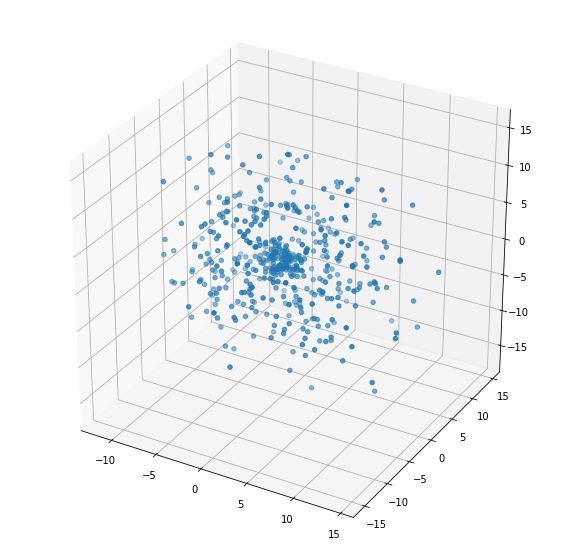

In [62]:
# plot the data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])

In [63]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

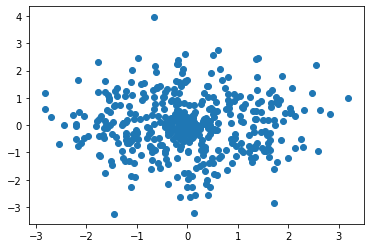

In [64]:
#Try PCA? Doesn't work
pca = PCA(n_components=3)
# scale the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# PCA
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1])



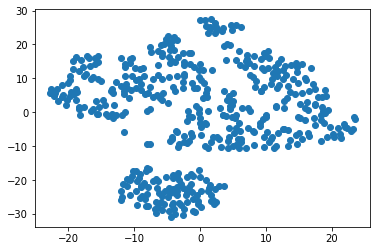

In [65]:
# Try t-SNE
t_SNE = TSNE(n_components=2)
tsnex = t_SNE.fit_transform(X)
plt.scatter(tsnex[:,0],tsnex[:,1])



In [66]:
# Compare this to kernel-PCA


## CHEMBL Datasets

You have been provided with 1.8M compounds as provided by ChEMBL, Let's do some exploratory data analysis on this data set to see what useful information and correlations can be extracted.

or Download:

https://www.ebi.ac.uk/chembl/g/#browse/compounds

In [67]:
chembl = pd.read_csv('chembl.csv', sep=';')
list(chembl)

['ChEMBL ID',
 'Name',
 'Synonyms',
 'Type',
 'Max Phase',
 'Molecular Weight',
 'Targets',
 'Bioactivities',
 'AlogP',
 'PSA',
 'HBA',
 'HBD',
 '#RO5 Violations',
 '#Rotatable Bonds',
 'Passes Ro3',
 'QED Weighted',
 'ACD ApKa',
 'ACD BpKa',
 'ACD LogP',
 'ACD LogD',
 'Aromatic Rings',
 'Structure Type',
 'Inorganic Flag',
 'Heavy Atoms',
 'HBA Lipinski',
 'HBD Lipinski',
 '#RO5 Violations (Lipinski)',
 'Molecular Weight (Monoisotopic)',
 'Molecular Species',
 'Molecular Formula',
 'Smiles']

In [68]:
# chose useful sets
chose_me = ['Molecular Weight','AlogP','PSA','HBA','HBD',]
subchembl = chembl.dropna(subset=chose_me)
subchembl[chose_me].head()

,Molecular Weight,AlogP,PSA,HBA,HBD
2,392.91,3.20,87.46,4.0,3.0
5,498.45,6.35,44.81,4.0,1.0
6,524.45,5.27,116.95,7.0,3.0
7,713.02,9.96,31.82,2.0,2.0
8,447.90,3.09,85.27,7.0,1.0


In [69]:
# normalize the data
temp_X = subchembl[chose_me].values 
features_X = StandardScaler().fit_transform(temp_X)

[0.569173   0.27121572 0.11515633 0.02899493 0.01546002]


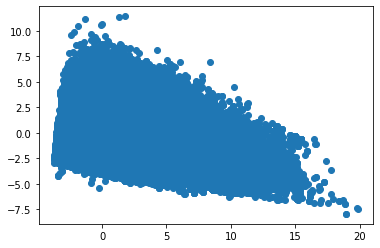

In [70]:
# PCA
pca = PCA(n_components=5)
pca.fit(features_X)  
print(pca.explained_variance_ratio_)  
X_pca = pca.transform(features_X)
plt.scatter(X_pca[:,0], X_pca[:,1])

[]

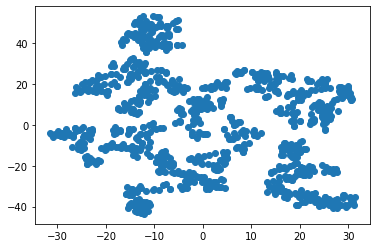

In [71]:
#t-SNE
# THIS MIGHT TAKE SOME TIME SO TAKE ONLY THE FIRST 1000 POINTS
t_SNE = TSNE(n_components=2)
tsnex = t_SNE.fit_transform(features_X[:1000])
plt.scatter(tsnex[:,0],tsnex[:,1])
plt.plot()

[]

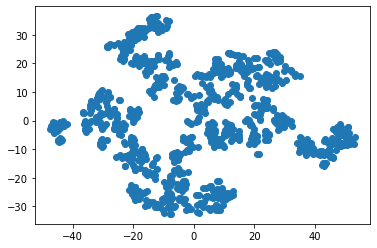

In [72]:
t_SNE = TSNE(n_components=2)
tsnex = t_SNE.fit_transform(features_X[1000:2000])
plt.scatter(tsnex[:,0],tsnex[:,1])
plt.plot()

In [73]:
smiles_only = chembl.dropna(subset=['Smiles'])

In [74]:
smiles_only.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,...,Structure Type,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles
2,CHEMBL4116853,NaN,NaN,Small molecule,0,392.91,0,NaN,3.20,87.46,...,MOL,0,26.0,6.0,4.0,0.0,392.1074,NEUTRAL,C18H21ClN4O2S,CCN1CCc2c(C1)sc(NC(=O)NCc3cccc(Cl)c3)c2C(=O)N
5,CHEMBL4117318,NaN,NaN,Small molecule,0,498.45,0,NaN,6.35,44.81,...,MOL,0,34.0,5.0,1.0,1.0,497.1637,NEUTRAL,C27H29Cl2N3O2,Clc1cccc(N2CCN(CCCCNC(=O)Oc3ccc(cc3)c4ccccc4)C...
6,CHEMBL4116337,NaN,NaN,Small molecule,0,524.45,0,NaN,5.27,116.95,...,MOL,0,33.0,8.0,4.0,2.0,523.0790,BASE,C23H22BrN7OS,NC(=N)N1CCC[C@H]1Cc2onc(n2)c3ccc(Nc4nc(cs4)c5c...
7,CHEMBL2105851,BISDEQUALINIUM DIACETATE,BISDEQUALINIUM DIACETATE,Small molecule,0,713.02,0,NaN,9.96,31.82,...,MOL,0,44.0,4.0,2.0,2.0,594.4651,NEUTRAL,C44H64N4O4,CC(=O)[O-].CC(=O)[O-].Cc1cc2NCCCCCCCCCCNc3cc(C...
8,CHEMBL3991223,NaN,NaN,Small molecule,0,447.90,0,NaN,3.09,85.27,...,MOL,-1,31.0,8.0,1.0,0.0,447.1473,NEUTRAL,C21H23ClFN5O3,CC(N1CC(C1)Oc2c(F)cccc2Cl)C3=Nc4c(cnn4C5CCOCC5...


In [75]:
bioactive = smiles_only.dropna(subset=['Bioactivities'])

In [76]:
bioactive.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,...,Structure Type,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles
92760,CHEMBL1379817,NaN,NaN,Small molecule,0,401.56,12,21.0,4.81,60.92,...,MOL,-1,27.0,5.0,0.0,0.0,401.1232,NEUTRAL,C20H23N3O2S2,Cc1onc(C)c1CSC2=Nc3sc4CCCCCc4c3C(=O)N2CC=C
92761,CHEMBL1999614,NaN,NaN,Small molecule,0,268.35,49,49.0,1.77,66.76,...,MOL,-1,19.0,4.0,2.0,0.0,268.1675,NEUTRAL,C15H24O4,CC(=O)O[C@]12CCCCC1C3(O)C(O)CCCC[C@@H]23
92762,CHEMBL451077,NaN,NaN,Small molecule,0,628.89,1,15.0,7.56,110.13,...,MOL,-1,45.0,7.0,2.0,2.0,628.4339,NEUTRAL,C38H60O7,CCCCCCCCCC(=O)OCC1=C[C@H]2[C@@H]3C(C)(C)[C@@]3...
92763,CHEMBL489710,NaN,NaN,Small molecule,0,333.40,1,4.0,1.65,111.61,...,MOL,-1,22.0,8.0,3.0,0.0,333.0466,NEUTRAL,C12H11N7OS2,Cn1cnnc1Sc2ccc(N)c(c2)C(=O)Nc3ncns3
92764,CHEMBL1893515,NaN,NaN,Small molecule,0,263.27,1,1.0,1.66,55.40,...,MOL,-1,19.0,4.0,1.0,0.0,263.0958,NEUTRAL,C14H14FNO3,Fc1cccc(\C=C\C(=O)OCC(=O)NC2CC2)c1


In [77]:
bioactive.drop(bioactive.columns[[1,2]], axis=1, inplace=True)

C:\Users\nebarlow\anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
print(bioactive.dtypes)
numerical = bioactive.select_dtypes(exclude=[object])
numerical['Smiles'] = bioactive['Smiles'].values
numerical.dropna(inplace=True)
print(bioactive.shape,numerical.shape)

ChEMBL ID                           object
Type                                object
Max Phase                            int64
Molecular Weight                   float64
Targets                              int64
Bioactivities                      float64
AlogP                              float64
PSA                                float64
HBA                                float64
HBD                                float64
#RO5 Violations                    float64
#Rotatable Bonds                   float64
Passes Ro3                          object
QED Weighted                       float64
ACD ApKa                           float64
ACD BpKa                           float64
ACD LogP                           float64
ACD LogD                           float64
Aromatic Rings                     float64
Structure Type                      object
Inorganic Flag                       int64
Heavy Atoms                        float64
HBA Lipinski                       float64
HBD Lipinsk

C:\Users\nebarlow\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(1780670, 29) (626150, 23)


C:\Users\nebarlow\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
